# Регуляризация SVM
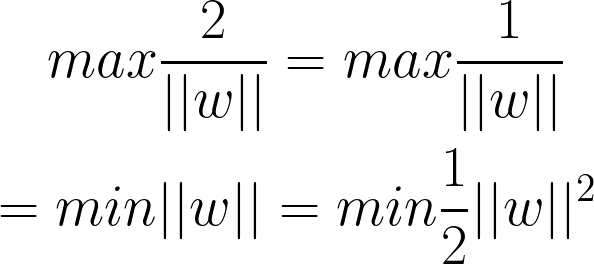

# Регуляризация с контролем ошибок
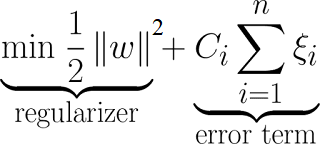

# Hinge Loss function
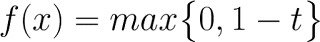
# Тогда формула оптимизации выглядит следующим образом
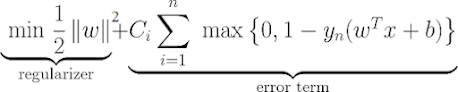

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
class CustomSVM:

    def __init__(self, C=1.0, learning_rate=0.01, num_iterations=100):
        self.C = C
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w1 = 0
        self.w0 = 0

    def hingeloss(self, w1, w0, X, y):
        reg = 0.5 * np.sum(w1 * w1)
        loss = 0

        for i in range(X.shape[0]):
            opt_term = y[i] * (np.dot(w1, X[i]) + w0)
            loss += reg + self.C * max(0, 1 - opt_term)
        return loss

    def fit(self, X, y):
        n_features = X.shape[1]
        n_samples = X.shape[0]

        self.w1 = np.zeros((1, n_features))
        self.w0 = 0
        losses = []

        for _ in range(self.num_iterations):
            loss = self.hingeloss(self.w1, self.w0, X, y)
            losses.append(loss)

            dw1 = np.zeros_like(self.w1)
            dw0 = 0

            for i in range(n_samples):
                ti = y[i] * (np.dot(self.w1, X[i]) + self.w0)

                if ti < 1:
                    dw1 += self.C * y[i] * X[i]
                    dw0 += self.C * y[i]

            self.w1 = self.w1 - self.learning_rate * (self.w1 - dw1)
            self.w0 = self.w0 + self.learning_rate * dw0

        return self.w1, self.w0, losses

    def predict(self, X):
        prediction = np.sign(np.dot(X, self.w1.T) + self.w0)
        return prediction


In [3]:
iris = load_iris()
X, y = iris.data, iris.target

X = X[(y == 0) | (y == 1)]
y = y[(y == 0) | (y == 1)]

y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = CustomSVM(C=4, learning_rate=0.0001, num_iterations=100)
w1, w0, losses = svm.fit(X_train_scaled, y_train)

In [6]:
y_pred = svm.predict(X_test_scaled)
lss = losses.pop()
rep = classification_report(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)

print(f"Значение последней ошибки: {lss}")
print(f"Предсказанные классы на тестовой выборке: {y_pred.T}")
print(f"Точность: {accuracy_score(y_test, y_pred)}")
print(f"Classification report:\n{rep}")
print(f"Матрица ошибок:\n{conf}")
print(f"w1, w0: {[w1, w0]}")

Значение последней ошибки: [31.74034459]
Предсказанные классы на тестовой выборке: [[ 1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1. -1.  1. -1.  1. -1.  1.  1.
  -1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1.]]
Точность: 1.0
Classification report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Матрица ошибок:
[[17  0]
 [ 0 13]]
w1, w0: [array([[ 0.27609038, -0.43892194,  0.53201293,  0.531748  ]]), 0.13040000000000032]


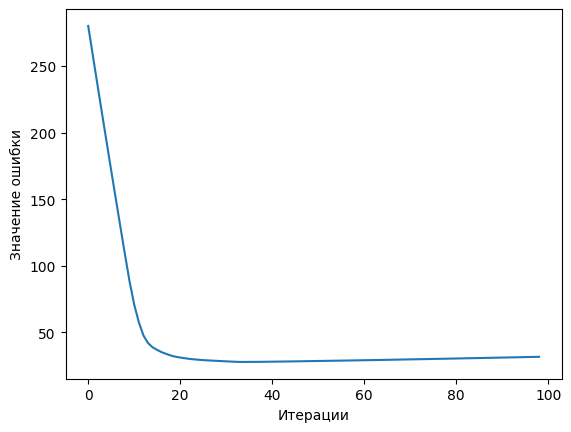

In [5]:
plt.plot(losses)
plt.xlabel('Итерации')
plt.ylabel('Значение ошибки')
plt.show()